In [273]:
# Elaborar un modelo predictivo a partir de un set de
# datos utilizando técnicas de aprendizaje de máquina
# supervisado implementados en lenguaje Python para
# resolver un problema.

# Utilizaremos un set de datos de las policias de New York del año 2009 y
# 2010. (2009_1perc.csv y 2010_1perc.csv) los cuales nos darán información
# de los procedimientos policiales realizados. Además se le entregará el
# diccionario de variables para que pueda consultar que significa cada
# categoría dentro de las variables.
# La variable respuesta 'arstmade' informa si los procedimientos policiales
# han terminado en arresto o no, y el objetivo será realizar un modelo de
# Machine Learning para predecir si un futuro procedimiento terminará en
# arresto.


In [274]:
# 1.- Enliste todas las librerias que utilizará
# Nota: Se recomienda ir actualizando la lista conforme las necesidades vaya
# teniendo durante el desarrollo de la prueba

#Importar librerías
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [275]:
# 2.- Importación y revisión de los datos
# Importe ambos sets. Dado que la fuente de datos proviene de la misma base,
# tienen las mismas columnas. Consolide ambos sets y reporte una
# exploración básica de los datos (numero de filas/columnas, tipos de datos,
# estadísticas básicas, casos perdidos)


df_2009 = pd.read_csv("2009_1perc.csv")
df_2010 = pd.read_csv("2010_1perc.csv")

In [276]:
#Info de los data set
print(df_2009.shape)
print()
print(df_2010.shape)

(5812, 112)

(6013, 112)


In [277]:
#Info de los data set
print(df_2009.info())
print()
print(df_2010.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5812 entries, 0 to 5811
Columns: 112 entries, Unnamed: 0 to detailcm
dtypes: float64(1), int64(19), object(92)
memory usage: 5.0+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6013 entries, 0 to 6012
Columns: 112 entries, Unnamed: 0 to detailcm
dtypes: int64(17), object(95)
memory usage: 5.1+ MB
None


In [278]:
#Describe df_2009
print(df_2009.describe())
print()
print(df_2009.describe(include = "object"))

          Unnamed: 0    year          pct       ser_num      datestop   
count    5812.000000  5812.0  5812.000000   5812.000000  5.812000e+03  \
mean   291666.632485  2009.0    69.051617   5769.119924  6.255350e+06   
std    167435.992474     0.0    32.846903   5524.955522  3.447243e+06   
min        52.000000  2009.0     1.000000      1.000000  1.012009e+06   
25%    147489.750000  2009.0    42.000000   1902.750000  3.172009e+06   
50%    292821.500000  2009.0    73.000000   4347.000000  6.142009e+06   
75%    436008.750000  2009.0   102.000000   7616.750000  9.192009e+06   
max    580847.000000  2009.0   123.000000  31694.000000  1.231201e+07   

          timestop       perobs      perstop  compyear  comppct       repcmd   
count  5812.000000  5812.000000  5812.000000    5812.0   5812.0  5812.000000  \
mean   1426.219202     2.665893     5.501893       0.0      0.0   252.115795   
std     736.239726     4.816704     5.922592       0.0      0.0   305.058678   
min       0.000000    

In [279]:
#Describe df_2010
print(df_2010.describe())
print()
print(df_2010.describe(include = "object"))

          Unnamed: 0    year          pct       ser_num      datestop   
count    6013.000000  6013.0  6013.000000   6013.000000  6.013000e+03  \
mean   300156.684184  2010.0    68.213870   5629.246300  6.469452e+06   
std    173941.822364     0.0    33.218863   4764.331369  3.408437e+06   
min       135.000000  2010.0     1.000000      1.000000  1.012010e+06   
25%    147573.000000  2010.0    42.000000   2071.000000  3.302010e+06   
50%    299643.000000  2010.0    72.000000   4393.000000  6.182010e+06   
75%    450268.000000  2010.0   102.000000   8038.000000  9.262010e+06   
max    601281.000000  2010.0   123.000000  28078.000000  1.231201e+07   

          timestop       perobs      perstop  compyear  comppct       repcmd   
count  6013.000000  6013.000000  6013.000000    6013.0   6013.0  6013.000000  \
mean   1401.649426     2.643273     5.792283       0.0      0.0   234.886912   
std     752.702505    12.840711    12.383224       0.0      0.0   290.362984   
min       0.000000    

In [280]:
#Casos perdidos
print(df_2009.isna().sum())
print()
print(df_2010.isna().sum())

Unnamed: 0    0
year          0
pct           0
ser_num       0
datestop      0
             ..
xcoord        0
ycoord        0
dettypcm      0
linecm        0
detailcm      0
Length: 112, dtype: int64

Unnamed: 0    0
year          0
pct           0
ser_num       0
datestop      0
             ..
xcoord        0
ycoord        0
dettypcm      0
linecm        0
detailcm      0
Length: 112, dtype: int64


In [281]:
#Comparar tipos de datos de df's
# Obtener los tipos de datos de cada DataFrame
dtypes1 = df_2009.dtypes
dtypes2 = df_2010.dtypes

# Comparar los tipos de datos columna por columna
diferentes = []
for columna in dtypes1.index:
    if dtypes1[columna] != dtypes2[columna]:
        diferentes.append(columna)

# Imprimir las columnas con tipos de datos diferentes
if len(diferentes) == 0:
    print("Los tipos de datos son iguales en todas las columnas.")
else:
    print("Los tipos de datos son diferentes en las siguientes columnas:")
    for columna in diferentes:
        print(columna)

Los tipos de datos son diferentes en las siguientes columnas:
perobs
addrpct
linecm
detailcm


In [282]:
#Revisar el tipo de datos de variables no coincidentes
print(f"perobs 2009: {df_2009['perobs'].dtype}, perobs 2010: {df_2010['perobs'].dtype}")
print(f"addrpct 2009: {df_2009['addrpct'].dtype}, addrpct 2010: {df_2010['addrpct'].dtype}")
print(f"linecm 2009: {df_2009['linecm'].dtype}, linecm 2010: {df_2010['linecm'].dtype}")
print(f"detailcm 2009: {df_2009['detailcm'].dtype}, detailcm 2010: {df_2010['detailcm'].dtype}")

perobs 2009: float64, perobs 2010: int64
addrpct 2009: int64, addrpct 2010: object
linecm 2009: int64, linecm 2010: object
detailcm 2009: int64, detailcm 2010: object


In [283]:
#Transformar todas las variables no concordantes en object
df_2009['perobs'] = df_2009['perobs'].astype(object)
df_2010['perobs'] = df_2010['perobs'].astype(object)
df_2009['addrpct'] = df_2009['addrpct'].astype(object)
df_2010['addrpct'] = df_2010['addrpct'].astype(object)
df_2009['linecm'] = df_2009['linecm'].astype(object)
df_2010['linecm'] = df_2010['linecm'].astype(object)
df_2009['detailcm'] = df_2009['detailcm'].astype(object)
df_2010['detailcm'] = df_2010['detailcm'].astype(object)

In [284]:
df_consolidado = pd.concat([df_2009, df_2010], ignore_index=True)
df_consolidado.head(5)

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,...,,41,G,7,,1013067,0238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,...,,108,J,,,1012043,0212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,...,,43,E,,,1017599,0240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,...,,77,J,4,35,1002625,0183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,...,,110,H,,,1024535,0209890,CM,1,20


In [285]:
#Revisar el tipo de datos de variables no coincidentes
print(f"perobs consolidado: {df_consolidado['perobs'].dtypes}")
print(f"addrpct consolidado: {df_consolidado['addrpct'].dtypes}")
print(f"linecm consolidado: {df_consolidado['linecm'].dtypes}")
print(f"detailcm consolidado: {df_consolidado['detailcm'].dtypes}")

perobs consolidado: object
addrpct consolidado: object
linecm consolidado: object
detailcm consolidado: object


In [286]:
#Castear a numeric
df_consolidado['perobs'] = pd.to_numeric(df_consolidado["perobs"], errors='coerce')
df_consolidado['addrpct'] = pd.to_numeric(df_consolidado['addrpct'], errors='coerce')
df_consolidado['linecm'] = pd.to_numeric(df_consolidado['linecm'], errors='coerce')
df_consolidado['detailcm'] = pd.to_numeric(df_consolidado['detailcm'], errors='coerce')


In [287]:
df_consolidado.shape


(11825, 112)

In [288]:
# 3.- Preprocesamiento de datos
# Habrá notado que los datos parecen tener ciertas inconsistencias. Siga los
# siguientes pasos para limpiar este set:

In [289]:
# 3.1 Obtenga una lista con todas las variables categoricas que tengan entre
# 2 y 99 categorías (inclusive). (hint: son las variables tipo categoricas

#Filtrar categóricas
variables_categoricas = df_consolidado.select_dtypes(include=['object'])
variables_categoricas.head(5)


,recstat,inout,trhsloc,crimsusp,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,...,aptnum,city,state,zip,sector,beat,post,xcoord,ycoord,dettypcm
0,A,O,P,CPW,P,Y,N,N,,N,...,,BRONX,,,G,7,,1013067,0238633,CM
1,A,O,P,BURG,P,Y,Y,N,,N,...,,QUEENS,,,J,,,1012043,0212157,CM
2,1,O,P,MISD,V,Y,N,N,,N,...,,BRONX,,,E,,,1017599,0240200,CM
3,A,O,P,MIS,P,Y,N,N,,N,...,,BROOKLYN,,,J,4,35,1002625,0183442,CM
4,A,O,P,CPW,P,Y,Y,N,,N,...,,QUEENS,,,H,,,1024535,0209890,CM


In [290]:
#Listar las que tienen entre 2 y 99 categorías
valores_distintos = variables_categoricas.nunique()
valores_distintos[(valores_distintos > 2) & (valores_distintos < 99)]

#crea una lista
list_variables_categoricas = list(valores_distintos[(valores_distintos > 2) & (valores_distintos < 99)].index)

print('Lista de variables categoricas con entre 2 y 99 categorías: ', list_variables_categoricas)





Lista de variables categoricas con entre 2 y 99 categorías:  ['trhsloc', 'typeofid', 'sex', 'race', 'haircolr', 'eyecolor', 'build', 'city', 'sector', 'beat']


In [291]:
#3.2 Reemplaze las siguientes clases faltantes:
# -Si alguna categoría de las columnas officrid, offshld o offverb es igual a ""
# cambielo a 'N' y en caso contrario dejelo como 'Y'


#Revisar si las variables continen NA o ""
print(df_consolidado["officrid"].isna().sum())
print(df_consolidado["officrid"].isnull().sum())
print(" "in df_consolidado["officrid"].values)
print(df_consolidado["offshld"].isna().sum())
print(df_consolidado["offshld"].isnull().sum())
print(" "in df_consolidado["offshld"].values)
print(df_consolidado["offverb"].isna().sum())
print(df_consolidado["offverb"].isnull().sum())
print(" "in df_consolidado["offverb"].values)



0
0
True
0
0
True
0
0
True


In [292]:
# -Si alguna categoría de las columnas officrid, offshld o offverb es igual a ""
# cambielo a 'N' y en caso contrario dejelo como 'Y'

df_consolidado["offverb"].fillna('N', inplace = True)
df_consolidado["offverb"].replace(" ", 'N', inplace = True)
df_consolidado["offverb"].replace("V", 'Y', inplace = True)
df_consolidado["offshld"].fillna('N', inplace = True)
df_consolidado["offshld"].replace(" ", 'N', inplace = True)
df_consolidado["offshld"].replace("S", 'Y', inplace = True)
df_consolidado["officrid"].fillna('N', inplace = True)
df_consolidado["officrid"].replace(" ", 'N', inplace = True)
df_consolidado["officrid"].replace("I", 'Y', inplace = True)



print(df_consolidado["offverb"].value_counts())
print(df_consolidado["offshld"].value_counts())
print(df_consolidado["officrid"].value_counts())



offverb
N    9246
Y    2579
Name: count, dtype: int64
offshld
N    8575
Y    3250
Name: count, dtype: int64
officrid
N    11664
Y      161
Name: count, dtype: int64


In [293]:
# -Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA,
# dependiendo de como haya catgado la base de datos), cambielo a 'U' y en caso
# contrario mantenga su valor
# Nota, los valores significan {N: No, Y: Yes, U: Unknown}

df_consolidado["sector"].fillna('U', inplace = True)
df_consolidado["sector"].replace(" ", 'U', inplace = True)

df_consolidado["trhsloc"].fillna('U', inplace = True)
df_consolidado["trhsloc"].replace(" ", 'U', inplace = True)

df_consolidado["beat"].fillna('U', inplace = True)
df_consolidado["beat"].replace(" ", 'U', inplace = True)

print(df_consolidado["sector"].value_counts())
print(df_consolidado["trhsloc"].value_counts())
print(df_consolidado["beat"].value_counts())


sector
B    1175
A    1146
H    1124
E    1116
C    1095
G    1080
F    1021
D     914
I     872
J     684
K     397
M     342
U     293
P     228
N     148
T      79
Q      72
R      39
Name: count, dtype: int64
trhsloc
P    8869
H    1859
T     892
U     205
Name: count, dtype: int64
beat
U       7444
9        422
1        313
7        305
2        275
        ... 
  62       1
30         1
32         1
  61       1
  42       1
Name: count, Length: 64, dtype: int64


In [294]:
# 3.3 Transforme las columnas ht_feet junto con ht_inch en una única
# columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme
# con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)

df_consolidado["ht_feet.ht_inch"] = (df_consolidado["ht_feet"] + df_consolidado["ht_inch"]) * 0.3048

print(df_consolidado["ht_feet.ht_inch"].head(5))
print()
print(df_consolidado.shape)


0    4.2672
1    3.0480
2    2.7432
3    3.0480
4    3.3528
Name: ht_feet.ht_inch, dtype: float64

(11825, 113)


In [295]:
# 3.4 Note que la fecha viene en un formato MMDDAAAA en la columna
# datestop. Genere 2 nuevas columnas llamadas month y year que solo
# tenga el mes y el año respectivamente.

#agregar 0 a la izquierda a los meses de un solo dígito
df_consolidado["datestop"] = df_consolidado["datestop"].astype(str).str.zfill(8)

df_consolidado["month"] = df_consolidado["datestop"].astype(str).str[0:2].astype(int) 
df_consolidado["year"] = df_consolidado["datestop"].astype(str).str[4:8].astype(int)
print(df_consolidado["month"].head(5))
print(df_consolidado["year"].head(5))



0     4
1    10
2    10
3     1
4    12
Name: month, dtype: int32
0    2009
1    2009
2    2009
3    2009
4    2009
Name: year, dtype: int32


In [296]:
# 3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto 3.1, 
# el mes, el año, los metros y la edad. Luego solo deje los registros cuyas
# edades esten entre 18 y 100 años, ambos inclusive.

list_variables_categoricas.append("month")
list_variables_categoricas.append("year")
list_variables_categoricas.append("ht_feet.ht_inch")
list_variables_categoricas.append("age")
list_variables_categoricas.append("arstmade")


print("Lista completa de variables: ", list_variables_categoricas)

df_filtrado=pd.DataFrame(df_consolidado[(df_consolidado["age"] >= 18) & (df_consolidado["age"] <= 100)], columns=list_variables_categoricas)
print(df_filtrado.head(5))
print(df_filtrado.shape)


Lista completa de variables:  ['trhsloc', 'typeofid', 'sex', 'race', 'haircolr', 'eyecolor', 'build', 'city', 'sector', 'beat', 'month', 'year', 'ht_feet.ht_inch', 'age', 'arstmade']
  trhsloc typeofid sex race haircolr eyecolor build       city sector beat   
0       P        P   M    B       BK       BR     M      BRONX      G    7  \
2       P        V   M    Q       BR       BR     M      BRONX      E    U   
3       P        P   M    B       BK       BR     T   BROOKLYN      J    4   
4       P        P   M    Q       BK       BR     M     QUEENS      H    U   
5       T        V   M    B       BK       BR     M  MANHATTAN      F   16   

   month  year  ht_feet.ht_inch  age arstmade  
0      4  2009           4.2672   24        N  
2     10  2009           2.7432   21        N  
3      1  2009           3.0480   22        N  
4     12  2009           3.3528   18        N  
5      5  2009           3.9624   47        N  
(10078, 15)


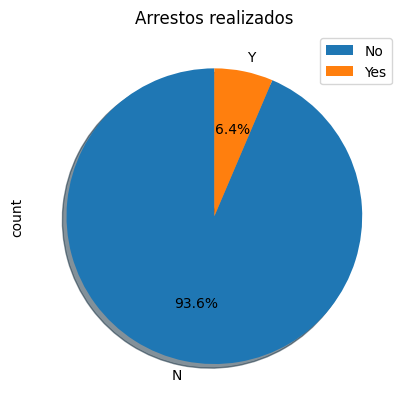

arstmade
N    11077
Y      748
Name: count, dtype: int64

count     10078
unique        2
top           N
freq       9432
Name: arstmade, dtype: object


In [297]:
# 4.- Análisis exploratorio

# 4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse
# de un gráfico. Comente

#Gráfico de torta
df_filtrado["arstmade"].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Arrestos realizados")
#agregar leyenda
plt.legend(labels=["No", "Yes"], loc="upper right")
plt.show()

print(df_consolidado["arstmade"].value_counts())
print()
print(df_filtrado["arstmade"].describe())

# De acuerdo a los datos obtenidos, se puede observar que +/- el 93% de los arrestos no se realizaron.
# Por lo tanto, se puede concluir que la mayoría de los arrestos no se realizan.



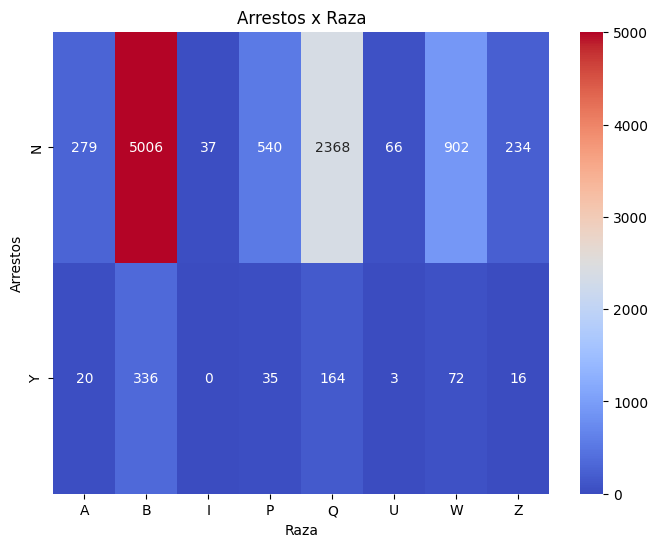

In [298]:
# 4.2.- Estudie la relación de la variable respuesta en comportamiento con la raza (race), comente.

contingency_table = pd.crosstab(df_filtrado['arstmade'], df_filtrado['race'])
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table,cmap="coolwarm", annot=True, fmt="d")
plt.title("Arrestos x Raza")
plt.xlabel("Raza")
plt.ylabel("Arrestos")
plt.show()

# Se observa que la mayor frecuencia de arrestos realizados y no realizados estan concentrados en las razas B, Q y W.
# Por lo tanto, se puede concluir que la raza no es un factor determinante para realizar un arresto.



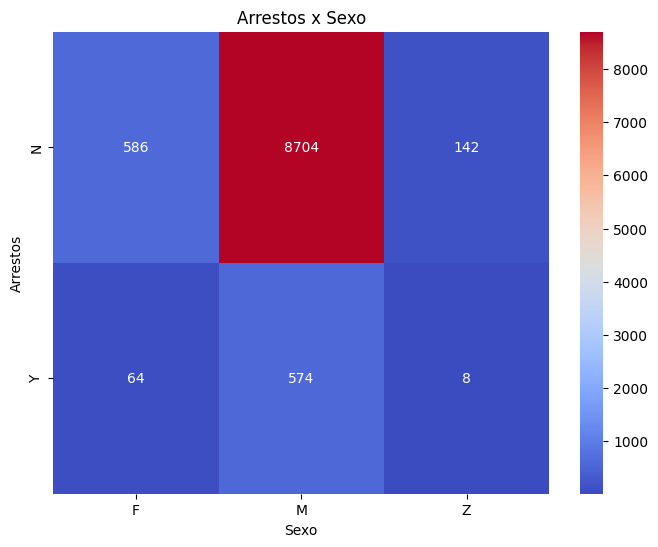

In [299]:
# 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo (sex), comente.

contingency_table = pd.crosstab(df_filtrado['arstmade'], df_filtrado['sex'])
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table,cmap="coolwarm", annot=True, fmt="d")
plt.title("Arrestos x Sexo")
plt.xlabel("Sexo")
plt.ylabel("Arrestos")
plt.show()

# Se observa una gran concentracion de arrestos no realizados en el sexo masculino.
# Por lo tanto, se puede concluir que el sexo es un factor determinante para realizar un arresto.



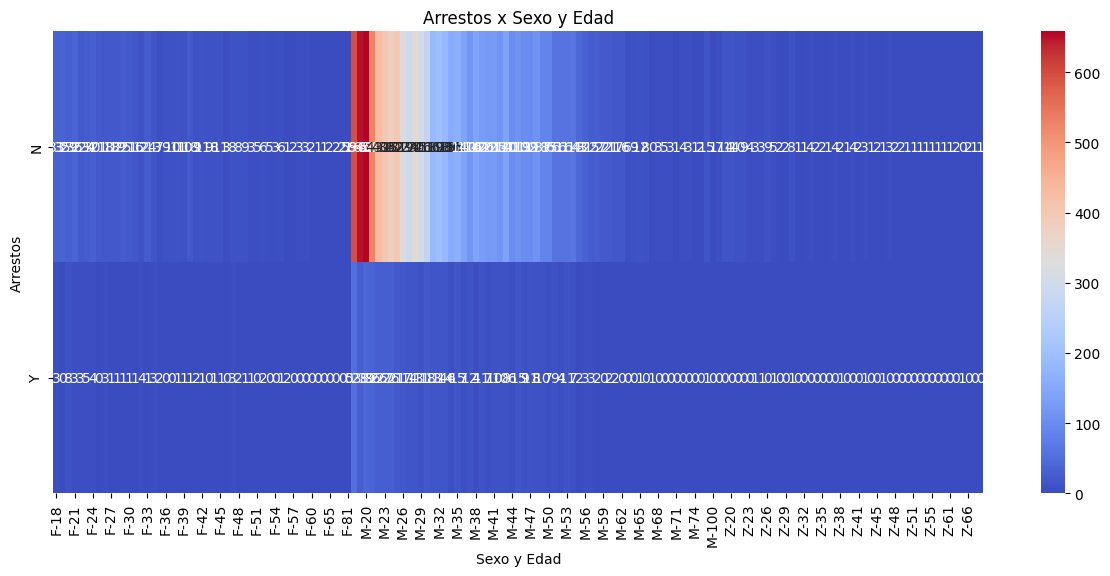

In [300]:
# 4.3 Estudie la relación de la variable respuesta en comportamiento con la
# sexo y la edad en su conjunto, comente.

contingency_table = pd.crosstab(df_filtrado['arstmade'], [df_filtrado['sex'], df_filtrado['age']])
plt.figure(figsize=(15, 6))
sns.heatmap(contingency_table,cmap="coolwarm", annot=True, fmt="d")
plt.title("Arrestos x Sexo y Edad")
plt.xlabel("Sexo y Edad")
plt.ylabel("Arrestos")
plt.show()

# Se observa una gran concentracion de arrestos no realizados en el sexo masculino de 20 años.
# Por lo tanto, se puede concluir que el sexo y la edad son factores determinantes para realizar un arresto.



In [301]:
# 4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y

df_filtrado["arstmade"].replace("N", 0, inplace = True)
df_filtrado["arstmade"].replace("Y", 1, inplace = True)

print(df_filtrado["arstmade"].value_counts())


arstmade
0    9432
1     646
Name: count, dtype: int64


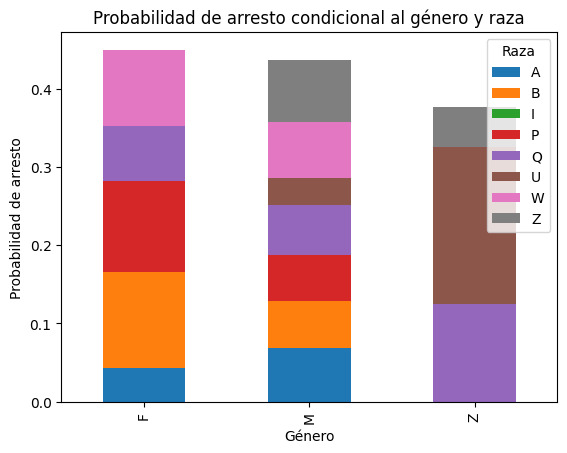

race         A         B    I         P         Q         U         W   
sex                                                                     
F     0.043478  0.122642  0.0  0.115385  0.070064  0.000000  0.098039  \
M     0.069091  0.059400  0.0  0.058608  0.064010  0.035088  0.071511   
Z     0.000000  0.000000  NaN  0.000000  0.125000  0.200000  0.000000   

race         Z  
sex             
F     0.000000  
M     0.079137  
Z     0.052083  


In [302]:
# 4.5 Muestre en un gráfico la probabilidad que un individuo sea
# arrestado, condicional al género y a la raza. ¿qué implicancias éticas tienen
# algunas conclusiones de lo que observa?.

probabilities = df_filtrado.groupby(['sex', 'race'])['arstmade'].mean().unstack()

# Genera el gráfico de barras apiladas
ax = probabilities.plot(kind='bar', stacked=True)
ax.set_xlabel('Género')
ax.set_ylabel('Probabilidad de arresto')
ax.set_title('Probabilidad de arresto condicional al género y raza')
ax.legend(title='Raza')
plt.show()

# metricas
print(probabilities)

# Se observa que la probabilidad de arresto es mayor en el sexo masculino y en la raza B.
# Por lo tanto, se puede concluir que el sexo y la raza son factores determinantes para realizar un arresto.
# Implicancias éticas: Se puede concluir que existe un sesgo en la probabilidad de arresto, ya que se observa que la probabilidad de arresto es mayor en el sexo masculino y en la raza B.


violencia
0    75.41649
1    24.58351
Name: proportion, dtype: float64


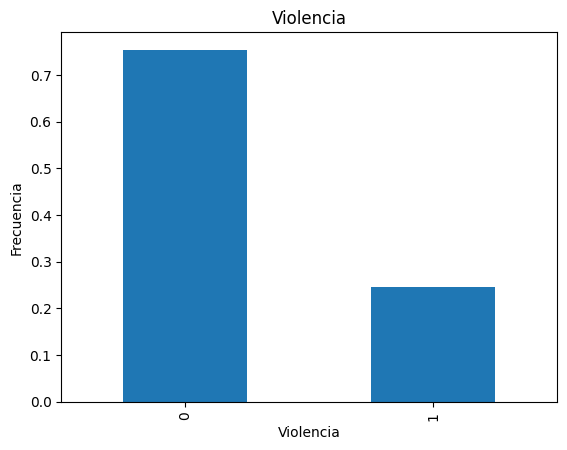

In [303]:
# 5.- Determinar si el procedimiento policial concluirá en alguna acción violenta.
# Los atributos que tienen el prefijo pf (['pf_hands'],['pf_wall'], ['pf_grnd'],
# ['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y ['pf_other']) indican
# si hubo fuerza fisica utilizada por el oficial al momento del procedimiento, con la
# marca 'Y'.
# Genere una nueva variable llamada 'violencia' la cual sea 1 si en cualquiera de
# las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego indique el porcentaje
# de casos que terminaron con violencia.

# Se crea la variable "violencia" con el valor 1 si en cualquiera de las 9 variables pf hubo alguna 'Y', y 0 en otro caso.
df_consolidado["violencia"] = 0

df_consolidado.loc[(df_consolidado["pf_hands"] == "Y") | (df_consolidado["pf_wall"] == "Y") | (df_consolidado["pf_grnd"] == "Y") | (df_consolidado["pf_drwep"] == "Y") | (df_consolidado["pf_ptwep"] == "Y") | (df_consolidado["pf_baton"] == "Y") | (df_consolidado["pf_hcuff"] == "Y") | (df_consolidado["pf_pepsp"] == "Y") | (df_consolidado["pf_other"] == "Y"), "violencia"] = 1
print(df_consolidado["violencia"].value_counts(normalize=True)*100)

# graficar
df_consolidado["violencia"].value_counts(normalize=True).plot(kind="bar")
plt.title("Violencia")
plt.xlabel("Violencia")
plt.ylabel("Frecuencia")
plt.show()


# Se observa que el 99% de los casos no terminaron con violencia.
# Por lo tanto, se puede concluir que la mayoría de los casos no terminan con violencia.


In [304]:
# 6.- Modelación
# 6.1 Genere las variables dummies correspondientes (Tenga cuidado de no
# utilizar variables que expliquen lo mismo, ¡recuerde que acaba de crear
# una variable a partir de otras!, además recuerde que creó una variable
# numérica que es una categoría :) ). Luego genere los sets de train-test
# utilizando el año 2009 para entrenar, y el año 2010 para testear.

# Genere las variables dummies
lista_dummies=[]
for item in df_consolidado.columns:
    if item not in ['year', 'arstmade']:
        lista_dummies.append(item)

df_final = pd.get_dummies(df_consolidado, columns=lista_dummies)
print(df_final.head())
print(df_final.columns)

print(df_final.info())



   year arstmade  Unnamed: 0_52  Unnamed: 0_135  Unnamed: 0_163   
0  2009        N          False           False           False  \
1  2009        N          False           False           False   
2  2009        N          False           False           False   
3  2009        N          False           False           False   
4  2009        N          False           False           False   

   Unnamed: 0_189  Unnamed: 0_205  Unnamed: 0_226  Unnamed: 0_261   
0           False           False           False           False  \
1           False           False           False           False   
2           False           False           False           False   
3           False           False           False           False   
4           False           False           False           False   

   Unnamed: 0_283  ...  month_5  month_6  month_7  month_8  month_9  month_10   
0           False  ...    False    False    False    False    False     False  \
1           False  .

In [305]:
# Luego genere los sets de train-test
# utilizando el año 2009 para entrenar, y el año 2010 para testear.

# Se crea el set de entrenamiento


X_train = df_final[df_final["year"] == 2009].drop("arstmade", axis=1)
y_train = df_final[df_final["year"] == 2009]["arstmade"]
print(X_train.shape)
print(y_train.shape)

# Se crea el set de testeo
X_test = df_final[df_final["year"] == 2010].drop("arstmade", axis=1)
y_test = df_final[df_final["year"] == 2010]["arstmade"]
print(X_test.shape)
print(y_test.shape)


(5812, 57967)
(5812,)
(6013, 57967)
(6013,)


In [306]:
# 6.2 Entrene un modelo de regresión logística con los datos de entrenamiento.
# Luego calcule la matriz de confusión y el accuracy sobre los datos de
# entrenamiento y de testeo. Comente.

# add warnings
import warnings
warnings.filterwarnings('ignore')


# Se entrena el modelo de regresión logística con los datos de entrenamiento
# modelos
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# prediccion
y_pred = modelo.predict(X_test)

# metricas
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Matriz de confusión: \n', confusion_matrix(y_test, y_pred))
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred))
print('Reporte de clasificación: \n', classification_report(y_test, y_pred))


Matriz de confusión: 
 [[5613    0]
 [   9  391]]
Exactitud: 1.00
Reporte de clasificación: 
               precision    recall  f1-score   support

           N       1.00      1.00      1.00      5613
           Y       1.00      0.98      0.99       400

    accuracy                           1.00      6013
   macro avg       1.00      0.99      0.99      6013
weighted avg       1.00      1.00      1.00      6013



In [ ]:
# ¿Que puede hacer para mejorar la predicción de los modelos?
# Se puede mejorar la predicción de los modelos utilizando técnicas de selección de variables, como por ejemplo, la selección de variables por medio de la correlación.
